In [24]:
from keras.models import load_model
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
#pre process image
def load_and_preprocess_image(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (224,224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [15]:
TEST_PATH = "../input/test/"

X_test = []
for image_path in os.listdir(TEST_PATH):
    image = load_and_preprocess_image(TEST_PATH + image_path)
    X_test.append(image)

X_test = np.array(X_test)

In [22]:
with open('../model/encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)

In [23]:
model = load_model('../model/model.h5')
predictions = model.predict(X_test)
label_predictions = encoder.inverse_transform(predictions)
# predictions

1/1 [==============================] - 2s 2s/step


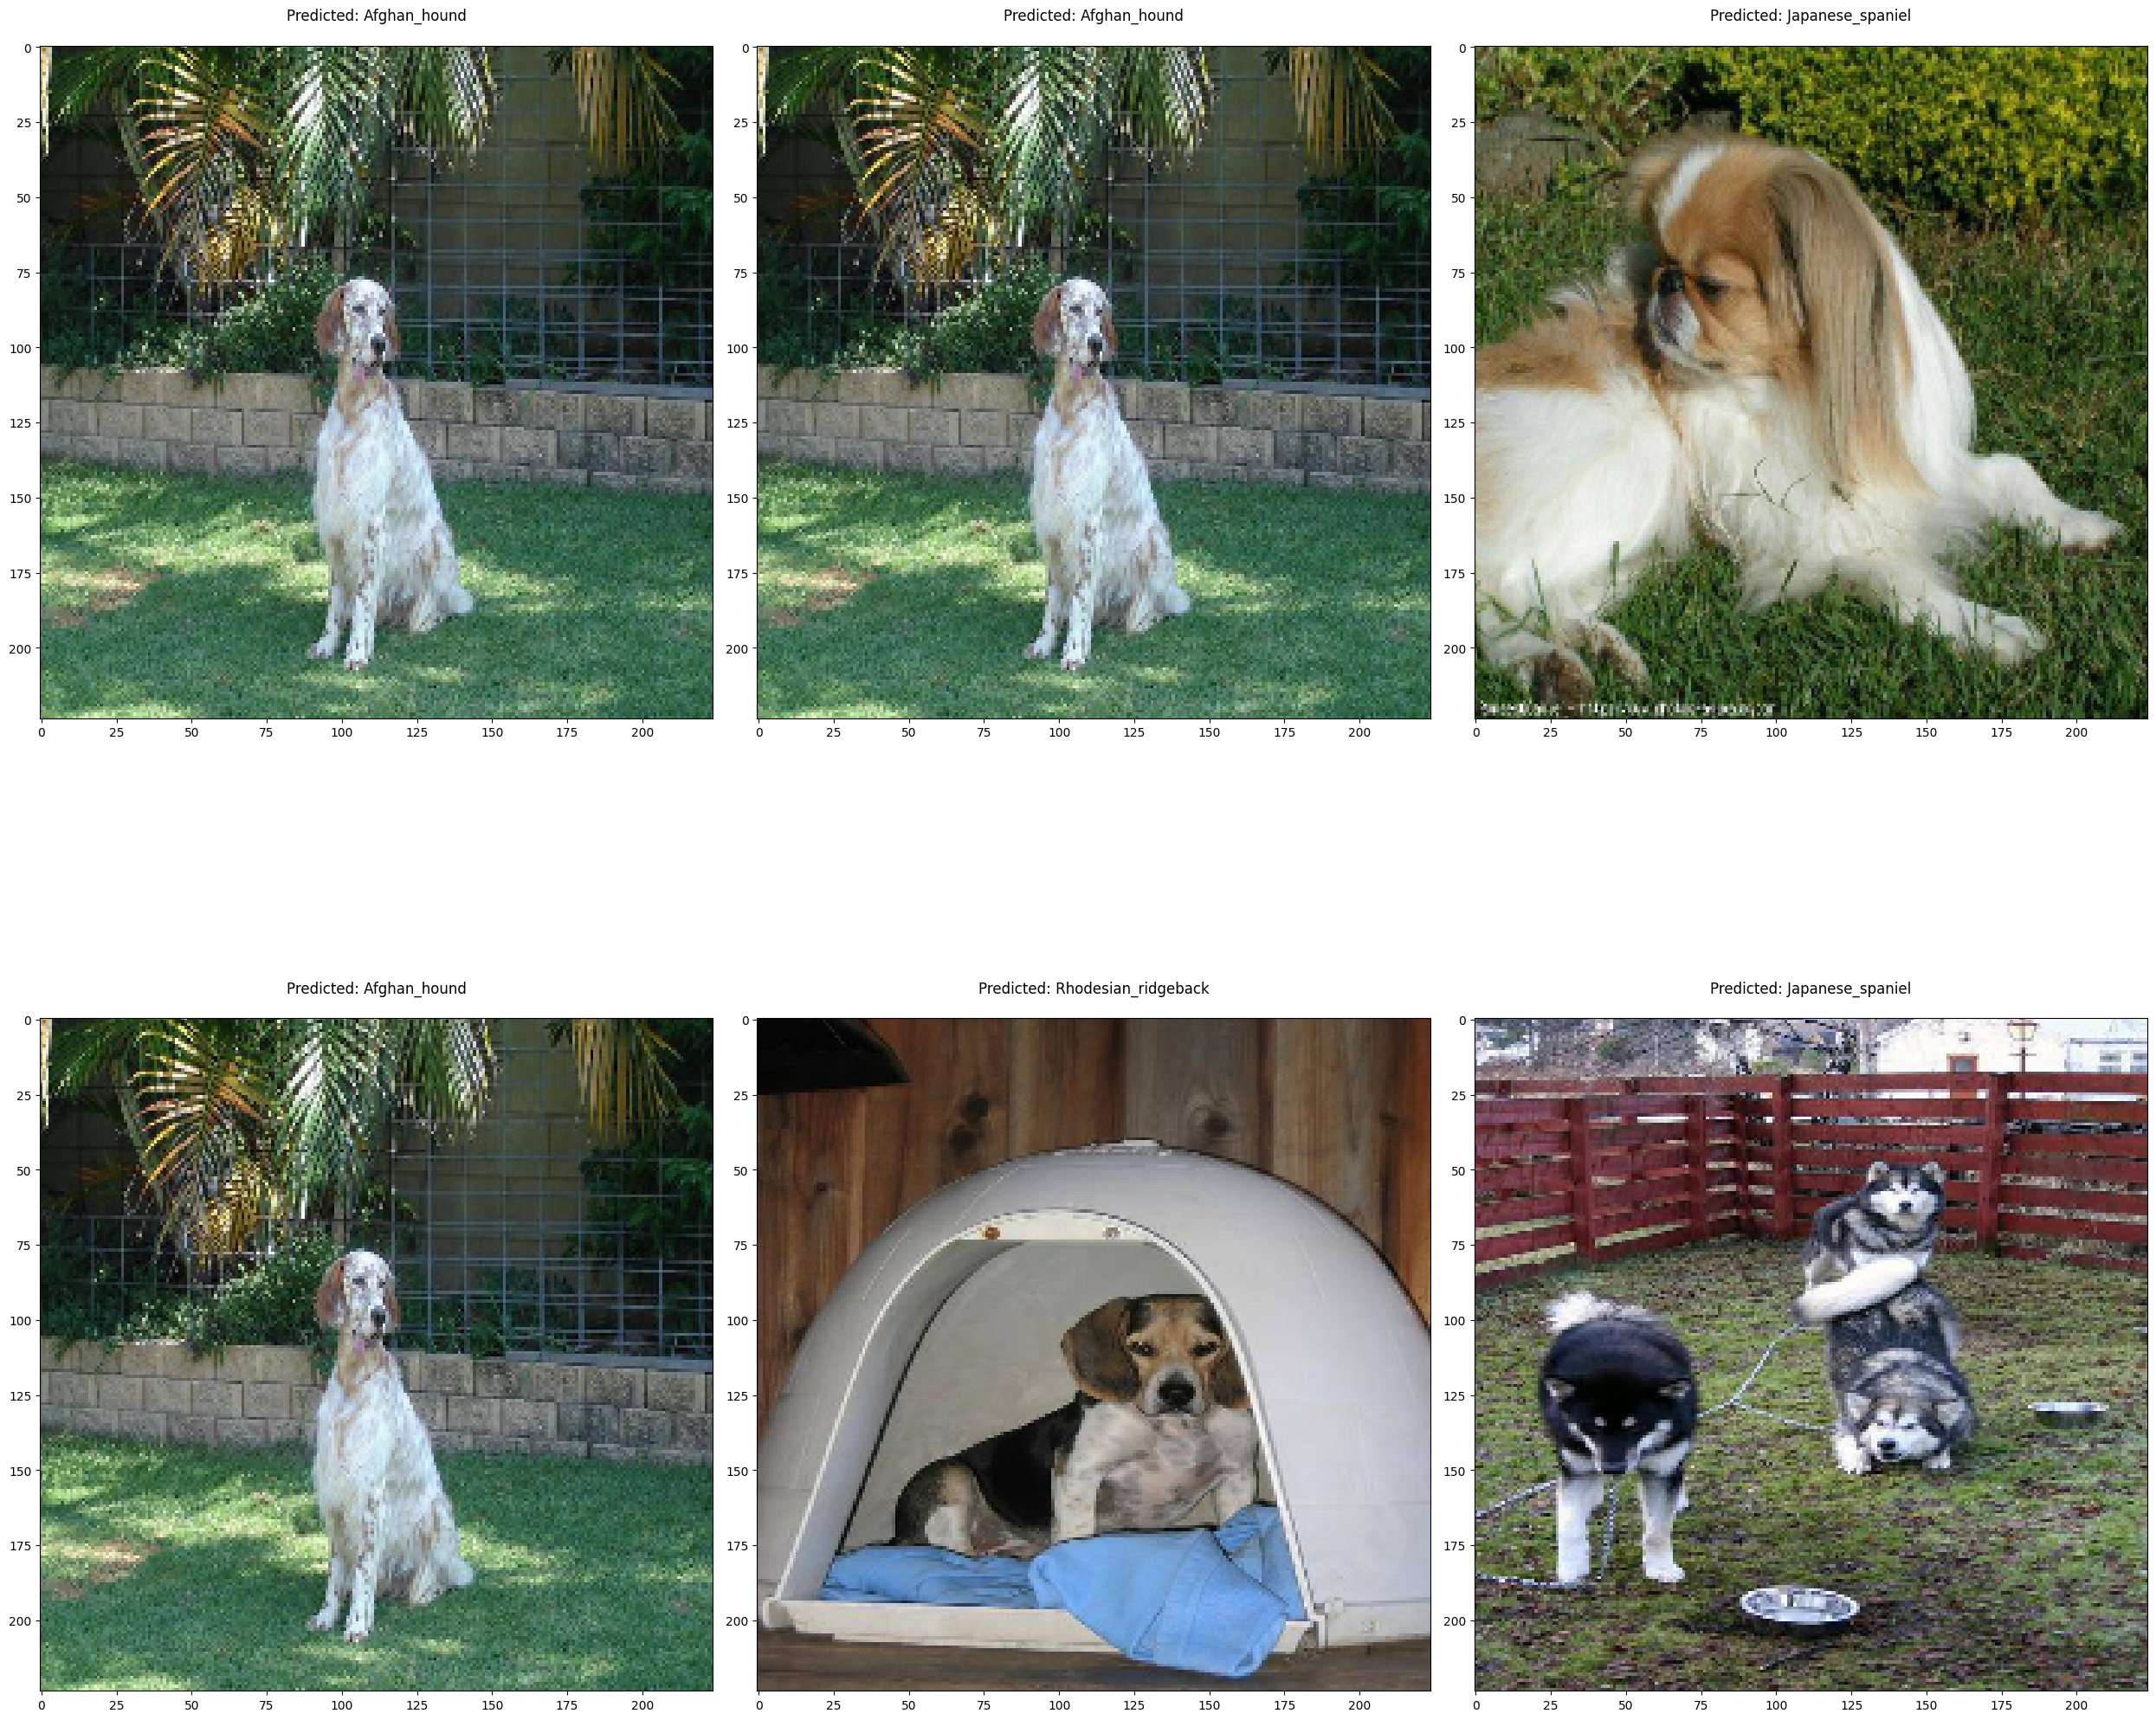

In [26]:
rows, cols = 2, 3
size = 25

fig,ax=plt.subplots(rows,cols)
fig.set_size_inches(size,size)
for i in range(rows):
    for j in range (cols):
        index = np.random.randint(0,len(X_test))
        ax[i,j].imshow(X_test[index])
        ax[i,j].set_title(f'Predicted: {label_predictions[index]}\n')
        
plt.tight_layout()